In [22]:
#python 3.x
import numpy as  np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import libvictor as lv
import tqdm
from collections import defaultdict
from scipy.stats import spearmanr

In [2]:
data_dir= '../'

In [3]:
# ANALYSIS_CARETYPE = 'Congregate Care'|'Foster Care', ~'Kinship Care'
# Provider.Type = 'Facility'

In [25]:
merged = pd.read_csv(os.path.join(data_dir, 'final_merge_minus_abscondence_with_desirability.csv'))
merged = merged[merged.ANALYSIS_CARETYPE != 'Kinship Care']
# merged = merged[merged.ANALYSIS_CARETYPE == 'Congregate Care']
# providers = pd.read_csv(os.path.join(data_dir, 'providers_clean.csv'))

In [26]:
fids = merged.FACILITY_ID

### Q: do facilities which focus on particular groups of children result in better outcomes than those which don't have a focus?

- plot distribution of stddev of child age vs proportion of positive outcome

In [27]:
#map rachel's MoveReasonDesirability column to my outcome column
# merged['outcome'] = merged.MoveReasonDesirability.map({np.nan:'UNKNOWN', 'Good':'GOOD', 'Bad':'BAD'})
# map MoveReasonDesirability to int
merged['outcome'] = merged.MoveReasonDesirability.map({np.nan:np.nan, 'Good':1, 'Bad':0})

In [28]:
by_fid = defaultdict(lambda: defaultdict(list))
for row_idx in merged.index:
    by_fid[merged.loc[row_idx].FACILITY_ID]['row_idxs'].append(row_idx)

In [29]:
for fid, d in by_fid.items():
    row_idxs = d['row_idxs']
    d['placements'] = merged.loc[row_idxs]
    d['age_std'] = d['placements'].PLMT_AGE.std()
    d['mean_outcome'] = d['placements'].outcome.mean()
    d['n_children'] = len(d['placements'].outcome)

In [30]:
age_stds = np.array([d['age_std'] for d in by_fid.values()])
age_std_cdf = lv.get_cdf(age_stds)

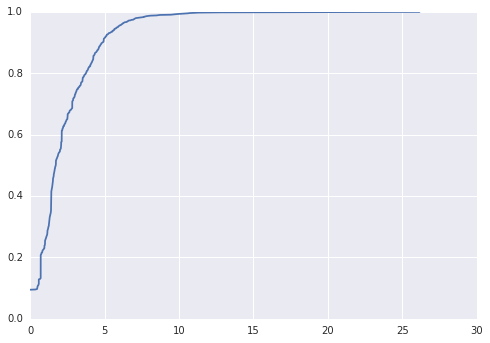

In [31]:
plt.plot(age_std_cdf.index, age_std_cdf)

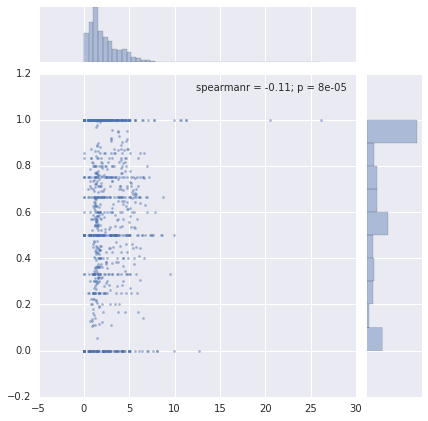

In [32]:
mean_outcomes = np.array([d['mean_outcome'] for d in by_fid.values()])
sns.jointplot(age_stds, mean_outcomes, alpha=0.5, marker='.', stat_func=spearmanr)
# sns.jointplot(age_stds, mean_outcomes, kind='hex')

In [ ]:
mean_outcomes = np.array([d['mean_outcome'] for d in by_fid.values()])
weights = np.log([d['n_children'] for d in by_fid.values()])
weights/=weights.max()
colors = np.array([[1,0,0,w] for w in weights])
plt.scatter(age_stds, mean_outcomes, color = colors, marker='.')
# sns.jointplot(age_stds, mean_outcomes, kind='hex')

In [ ]:
weights=d['n_children']